## **TASK N°1**: *IRIS FLOWER CLASSIFICATION*

### The iris dataset contains 4 features;

 * ####  SepalLengthCm: the sepal length in centimeters
 * ####  SepalWidthCm: the sepal width in centimeters
 * ####  PetalLengthCm: the petal length in centimeters
 * ####  PetalWidthCm: the petal width in centimeters

### and 3 species;
* ####  Setosa
* ####  Versicolor
* ####  Virginica

 ### The task consists of using a machine learning model to classify the iris species according to their measurements.

 ### Here are the steps taken in order to complete the task:
#### 1. upload the iris dataset
#### 2. clean the dataset if needed
#### 3. study visualized data
#### 4. choose ML models for a supervised learning classification to train and test
#### 5. choose the most accurate model from logistic regression, decision tree algorithm and KNN 
#### 6. save the model






--> In the following notebook, you can find my work for the first data science task assigned by OSISInfoBytes.
 

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/advertisingcsv/Advertising.csv
/kaggle/input/sms-spam-collection-dataset/spam.csv
/kaggle/input/iriscsv/Iris.csv


## 1. data Manipulation 

In [24]:
#open the csv file and load the dataset
df = pd.read_csv("/kaggle/input/iriscsv/Iris.csv") 

In [25]:
#inspect the first 5 lines
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
#drop id column
df.drop('Id',axis=1,inplace=True)

In [27]:
#re-inspect the columns
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
#inpect the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
#inspect for null values
df.isnull().sum().sort_values(ascending = False)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
#inspect for duplicates
df.duplicated().sum()


3

In [31]:
#remove duplicate values
df.drop_duplicates(inplace=True)

In [32]:
#count the kind the classes
df["Species"].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [33]:
#check for unique values
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [34]:
#importing Python data visualization libraries
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

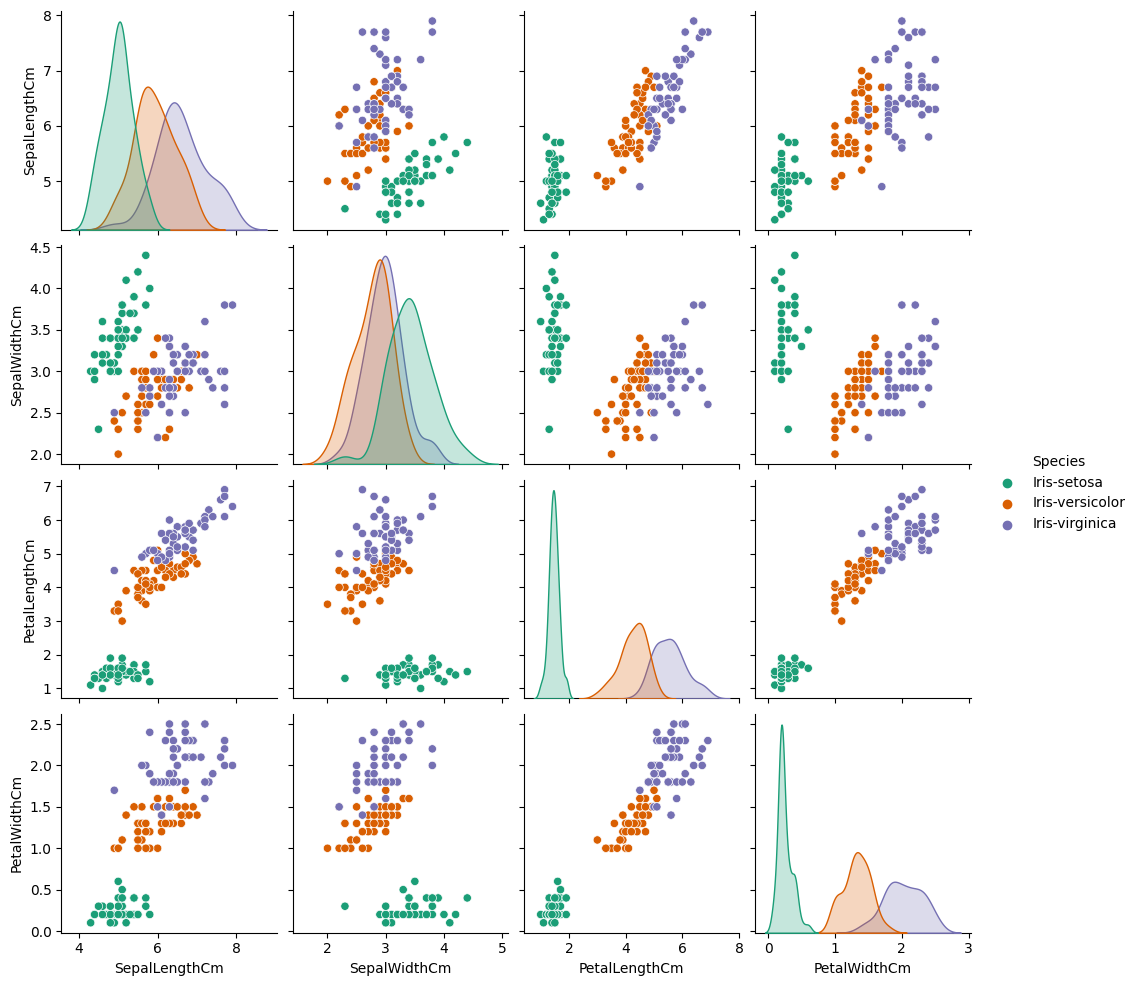

In [35]:
#make pair plot
sns.pairplot(df,hue= 'Species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()

#### Through the pair plots, we can remark that the iris-setosa specie can be easily differentiated.

#### However, the other two species can be mingled together and it is hard to distinguish between them. That's where our focus should be on / thats where errors can produce

In [36]:
#correlation matrix
numerical_columns = df.select_dtypes(include=['number'])
correlation = numerical_columns.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


<Axes: >

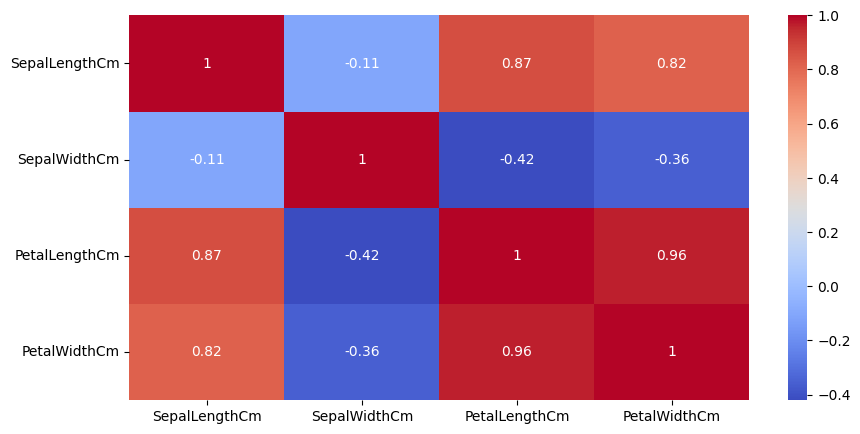

In [37]:
#correlation matrix using a heatmap
fig, axe = plt.subplots(figsize=(10,5))
sns.heatmap(correlation,annot=True,ax=axe, cmap='coolwarm')

## 2. Model training

In [41]:
#x for features and y for target
x = df.drop(['Species'], axis=1)
y = df['Species']

In [42]:
from sklearn.model_selection import train_test_split

#split the test-train data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.1 Logistic regression model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model1 = LogisticRegression()
model1.fit(x_train,y_train)
print("Accuracy of the logistic regression model:\n ",  metrics.accuracy_score(y_test, y_pred))
print("Classification Report of the logistic regression model:\n", classification_report(y_test, y_pred))
print("Confusion Matrix of the logistic regression model:\n",  confusion_matrix(y_test, y_pred))

Accuracy of the logistic regression model:
  0.9333333333333333
Classification Report of the logistic regression model:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Confusion Matrix of the logistic regression model:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


### 2.2 Decision Tree model

In [75]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2 = model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

print("Accuracy of the decision tree model:\n ", metrics.accuracy_score(y_test, y_pred))
print("Classification Report of the decision tree model:\n", classification_report(y_test, y_pred))
print("Confusion Matrix of the decision tree model:\n",  confusion_matrix(y_test, y_pred))

#source: https://www.datacamp.com/tutorial/decision-tree-classification-python

Accuracy of the decision tree model:
  0.9666666666666667
Classification Report of the decision tree model:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix of the decision tree model:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


### 2.3 K-Nearest Neighbors model (KNN)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

print("Accuracy of the KNN model:\n", metrics.accuracy_score(y_test, y_pred))
print("Classification Report of the KNN model:\n", classification_report(y_test, y_pred))
print("Confusion Matrix of the KNN model:\n",  confusion_matrix(y_test, y_pred))

Accuracy of the KNN model:
 0.9333333333333333
Classification Report of the KNN model:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Confusion Matrix of the KNN model:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


### After inspecting the accuracy of each model, we can confidently choose the decision tree model. Now all that is left to do is save the model.

In [76]:
#save model
import pickle

with open('model2','wb') as file:
    pickle.dump(model2,file)

### And that concludes the first classification task.